# Introduction #

This lesson and the next make use of what are known as *unsupervised learning* algorithms. Unsupervised algorithms don't make use of a target; instead, their purpose is to learn some property of the data, to represent the structure of the features in a certain way. In the context of feature engineering for prediction, you could think of an unsupervised algorithm as a "feature discovery" technique.

*Този и следващият урок използват това, което е известно като алгоритми за __неконтролирано обучение__ . Неконтролираните алгоритми не използват цел; вместо това тяхната цел е да научат някакво свойство на данните, да представят структурата на характеристиките по определен начин. В контекста на проектиране на функции за прогнозиране, можете да мислите за неконтролиран алгоритъм като техника за `„откриване на характеристики“`.*

**Clustering** simply means the assigning of data points to groups based upon how similar the points are to each other. A clustering algorithm makes "birds of a feather flock together," so to speak.

*__Групирането__ просто означава присвояване на точки от данни на групи въз основа на това колко сходни са точките една с друга. Алгоритъмът за клъстериране прави така да се каже „ято птици заедно“.*

When used for `feature engineering`, we could attempt to discover groups of customers representing a market segment, for instance, or geographic areas that share similar weather patterns. Adding a feature of cluster labels can help machine learning models untangle complicated relationships of space or proximity.

*Когато се използва за `инженеринг на характеристики`, бихме могли да се опитаме да открием групи от клиенти, представляващи пазарен сегмент, например, или географски области, които споделят подобни климатични условия. Добавянето на функция на етикети на клъстери може да помогне на моделите за машинно обучение да разплитат сложни връзки на пространство или близост*

# Cluster Labels as a Feature #
#### (Клъстерни етикети като характеристикa)

Applied to a single real-valued feature, clustering acts like a traditional "binning"or ["discretization"](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html) transform.

*Приложено към една функция с реална стойност, клъстерирането действа като традиционно „групиране“ или "дискретизационна" трансформация*

On multiple features, it's like "multi-dimensional binning" (sometimes called *vector quantization*).

*При многобройни характеристики това е като „многоизмерно групиране“ (понякога наричано __векторно квантуване__).*

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/sr3pdYI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Clustering a single feature. <strong>Right:</strong> Clustering across two features.
</center></figcaption>
</figure>

Added(добавена) to a dataframe, a feature(характеристика) of cluster labels(с етикети на клъстър) might look like this:

| Longitude | Latitude | Cluster |
|-----------|----------|---------|
| -93.619   | 42.054   | 3       |
| -93.619   | 42.053   | 3       |
| -93.638   | 42.060   | 1       |
| -93.602   | 41.988   | 0       |

It's important to remember that this `Cluster` feature is categorical. Here, it's shown with a label encoding (that is, as a sequence of integers) as a typical clustering algorithm would produce; depending on your model, a one-hot encoding may be more appropriate.

*Важно е да запомните, че тази характеристика на клъстера е категорийна. Тук е показано с кодиране на етикет (тоест като последователност от цели числа), както би произвел типичен алгоритъм за клъстериране; в зависимост от вашия модел еднократното кодиране(ОН-encoding) може да е по-подходящо.*

The motivating idea for adding cluster labels is that the clusters will break up complicated relationships across features into simpler chunks. Our model can then just learn the simpler chunks one-by-one instead having to learn the complicated whole all at once. It's a "divide and conquer" strategy.

*Мотивиращата идея за добавяне на етикети на клъстери е, че клъстерите ще разделят сложните връзки между функциите на по-прости части. Тогава нашият модел може просто да научи по-простите части едно по едно, вместо да трябва да научи сложното цяло наведнъж. Това е стратегия "разделяй и владей".*

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/rraXFed.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Clustering the "YearBuilt" feature helps this linear model learn its relationship to "SalePrice".
</center></figcaption>
</figure>

The figure shows how clustering can improve a simple linear model. The curved relationship between the `YearBuilt` and `SalePrice` is too complicated for this kind of model -- it *underfits*. On smaller chunks however the relationship is *almost* linear, and that the model can learn easily.

*Извитата връзка между YearBuilt и SalePrice е твърде сложна за този вид модел -- не отговаря(**it underfits**). При по-малки парчета обаче връзката е почти линейна и моделът може да се научи лесно.*

# k-Means Clustering #

There are a great many clustering algorithms. They differ primarily in how they measure "similarity" or "proximity" and in what kinds of features they work with. The algorithm we'll use, k-means, is intuitive and easy to apply in a feature engineering context. Depending on your application another algorithm might be more appropriate.

*Има много алгоритми за групиране. Те се различават основно по това. как измерват „сходството“ или „близостта“ и по това с какви характеристики работят. Алгоритъмът, който ще използваме, k-means(средства), е интуитивен и лесен за прилагане в контекст на инженеринг на характеристики. В зависимост от вашето приложение друг алгоритъм може да е по-подходящ.*

**K-means clustering** measures similarity using ordinary straight-line distance (Euclidean distance, in other words). It creates clusters by placing a number of points, called **centroids**, inside the feature-space. Each point in the dataset is assigned to the cluster of whichever centroid it's closest to. The "k" in "k-means" is how many centroids (that is, clusters) it creates. You define the k yourself.

***K-means групиране** измерва сходството, използвайки обикновено разстояние по права линия (с други думи, евклидово разстояние). Той създава клъстери чрез поставяне на няколко точки, наречени **центроиди**, вътре в пространството на характеристиките. Всяка точка в набора от данни се присвоява на клъстера на който и да е центроид, до който е най-близо. „k“ в „k-means“ е колко центроиди (т.е. клъстери) създава. Вие сами определяте k.*

You could imagine each centroid capturing points through a sequence of radiating circles. When sets of circles from competing centroids overlap they form a line. The result is what's called a **Voronoi tessallation**. The tessallation shows you to what clusters future data will be assigned; the tessallation is essentially what k-means learns from its training data.

*Можете да си представите, че всеки центроид улавя точки чрез поредица от излъчващи кръгове. Когато набори от кръгове от конкуриращи се центроиди се припокриват, те образуват линия. Резултатът е това, което се нарича **тесалация на Вороной**. Тесалацията ви показва към какви клъстери ще бъдат присвоени бъдещи данни; тесалацията е по същество това, което k-means научава от своите данни за обучение.*

The clustering on the [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset above is a k-means clustering. Here is the same figure with the tessallation and centroids shown.

*наборът от данни по-горе е k-means групиране. Ето същата фигура с показаните тесалация и центроиди.*

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/KSoLd3o.jpg" width=450, alt="">
<figcaption style="textalign: center; font-style: italic"><center>K-means clustering creates a Voronoi tessallation of the feature space.
</center></figcaption>
</figure>

Let's review how the k-means algorithm learns the clusters and what that means for feature engineering. We'll focus on three parameters from scikit-learn's implementation: `n_clusters`, `max_iter`, and `n_init`.

*Нека прегледаме как алгоритъмът k-means научава клъстерите и какво означава това за инженеринга на характеристики. Ще се съсредоточим върху три параметъра от имплементацията на scikit-learn: `n_clusters`, `max_iter` и `n_init`.*

It's a simple two-step process. The algorithm starts by randomly initializing some predefined number (`n_clusters`) of centroids. It then iterates over these two operations:
1. assign points to the nearest cluster centroid
2. move each centroid to minimize the distance to its points

*Това е прост процес в две стъпки. Алгоритъмът започва с произволно инициализиране на някакъв предварително определен брой (`n_clusters`) центроиди. След това итерира тези две операции:
1. присвоете точки на най-близкия център на клъстера
2. преместете всеки центроид, за да минимизирате разстоянието до неговите точки*

It iterates over these two steps until the centroids aren't moving anymore, or until some maximum number of iterations has passed (`max_iter`).

*Той извършва итерации през тези две стъпки, докато центроидите престанат да се движат или докато не премине някакъв максимален брой итерации (`max_iter`).*

It often happens that the initial random position of the centroids ends in a poor clustering. For this reason the algorithm repeats a number of times (`n_init`) and returns the clustering that has the least total distance between each point and its centroid, the optimal clustering.

*Често се случва първоначалната произволна позиция на центроидите да завърши с лошо групиране. Поради тази причина алгоритъмът се повтаря няколко пъти (`n_init`) и връща клъстерирането, което има най-малко общо разстояние между всяка точка и нейния център, оптималното клъстериране.*

The animation below shows the algorithm in action. It illustrates the dependence of the result on the initial centroids and the importance of iterating until convergence.

*Анимацията по-долу показва алгоритъма в действие. Той илюстрира зависимостта на резултата от началните центроиди и важността на итерацията до конвергенция.*

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/tBkCqXJ.gif" width=550, alt="">
<figcaption style="textalign: center; font-style: italic"><center>The K-means clustering algorithm on Airbnb rentals in NYC.
</center></figcaption>
</figure>

You may need to increase the `max_iter` for a large number of clusters or `n_init` for a complex dataset. Ordinarily though the only parameter you'll need to choose yourself is `n_clusters` (k, that is). The best partitioning for a set of features depends on the model you're using and what you're trying to predict, so it's best to tune it like any hyperparameter (through cross-validation, say).

*Може да се наложи да увеличите `max_iter` за голям брой клъстери или `n_init` за сложен набор от данни. Обикновено обаче единственият параметър, който ще трябва да изберете сами, е `n_clusters` (т.е. k). Най-доброто разделяне за набор от функции зависи от модела, който използвате, и това, което се опитвате да предвидите, така че е най-добре да го настроите като всеки хиперпараметър (чрез кръстосано валидиране, да речем).*

# Example - California Housing #

As spatial features/ Като пространствени характеристики, [*California Housing*](https://www.kaggle.com/camnugent/california-housing-prices)'s `'Latitude'` and `'Longitude'` make natural candidates for k-means clustering. In this example we'll cluster these with `'MedInc'` (median income) to create economic segments in different regions of California.

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("../input/fe-course-data/housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head(10)

/tmp/ipykernel_32/443879611.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
5,4.0368,37.85,-122.25
6,3.6591,37.84,-122.25
7,3.1200,37.84,-122.25
8,2.0804,37.84,-122.26
9,3.6912,37.84,-122.25


Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

*Тъй като клъстерирането на k-means е чувствително към мащаба, може да е добра идея да премащабирате или __нормализирате__ данните с екстремни стойности. Нашите функции вече са приблизително в същия мащаб, така че ще ги оставим такива, каквито са.*

In [4]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head(15)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,2
5,4.0368,37.85,-122.25,2
6,3.6591,37.84,-122.25,2
7,3.1200,37.84,-122.25,2
8,2.0804,37.84,-122.26,2
9,3.6912,37.84,-122.25,2


Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


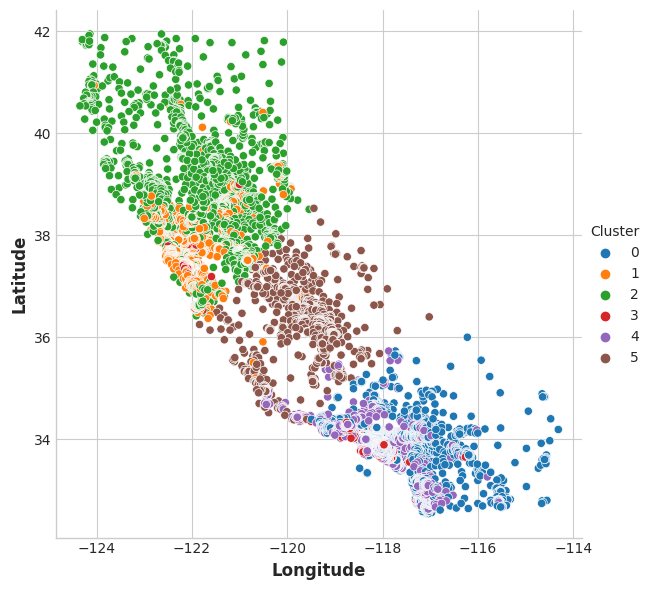

In [5]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

In [6]:
# my
X["Cluster_1"] = kmeans.fit_predict(X)
X["Cluster_1"] = X["Cluster_1"].astype("category")

# After creating of 2.feature "Cluster_1", what is same as 1. one, 
# "k-means" calculates again and reordered the clusters
X.head(10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,MedInc,Latitude,Longitude,Cluster,Cluster_1
0,8.3252,37.88,-122.23,1,0
1,8.3014,37.86,-122.22,1,0
2,7.2574,37.85,-122.24,1,0
3,5.6431,37.85,-122.25,1,0
4,3.8462,37.85,-122.25,2,4
5,4.0368,37.85,-122.25,2,4
6,3.6591,37.84,-122.25,2,4
7,3.1200,37.84,-122.25,2,4
8,2.0804,37.84,-122.26,2,4
9,3.6912,37.84,-122.25,2,4


In [22]:
# number of rows(records) and slice: only with Latitude 34 and 36 
X["Cluster_1"].shape, X[(X["Latitude"] == 36.00) | (X["Latitude"] == 34)]

((20640,),
        MedInc  Latitude  Longitude Cluster Cluster_1
 2800   1.1471      36.0    -116.22       0         1
 3254   2.0335      36.0    -120.14       5         3
 4914   2.1480      34.0    -118.27       0         1
 4915   1.7052      34.0    -118.27       0         1
 4916   1.7500      34.0    -118.27       0         1
 ...       ...       ...        ...     ...       ...
 13218  5.7338      34.0    -117.68       4         2
 13219  2.5781      34.0    -117.69       0         1
 13220  5.7021      34.0    -117.70       4         2
 13364  5.4110      34.0    -117.66       4         2
 13367  4.0037      34.0    -117.58       0         1
 
 [154 rows x 5 columns])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


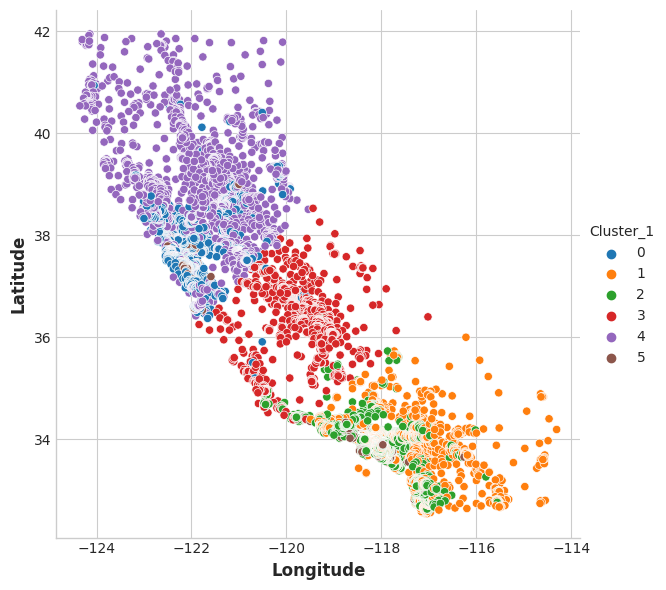

In [7]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster_1", data=X, height=6,
);

The target in this dataset is `MedHouseVal` (median house value). These box-plots show the distribution of the target within each cluster. If the clustering is informative, these distributions should, for the most part, separate across `MedHouseVal`, which is indeed what we see.

*Целта в този набор от данни е `MedHouseVal` (средна стойност на къщата). Тези графики показват разпределението на целта във всеки клъстер. Ако клъстерирането е информативно, тези разпределения трябва в по-голямата си част да се разделят в MedHouseVal, което наистина е това, което виждаме*

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


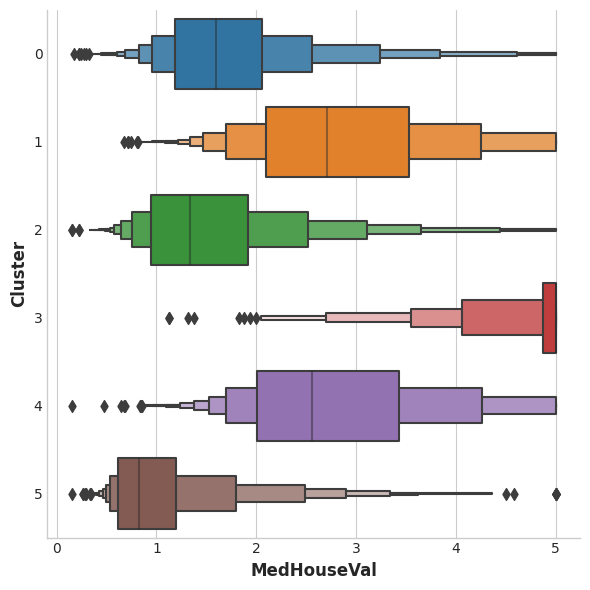

In [25]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


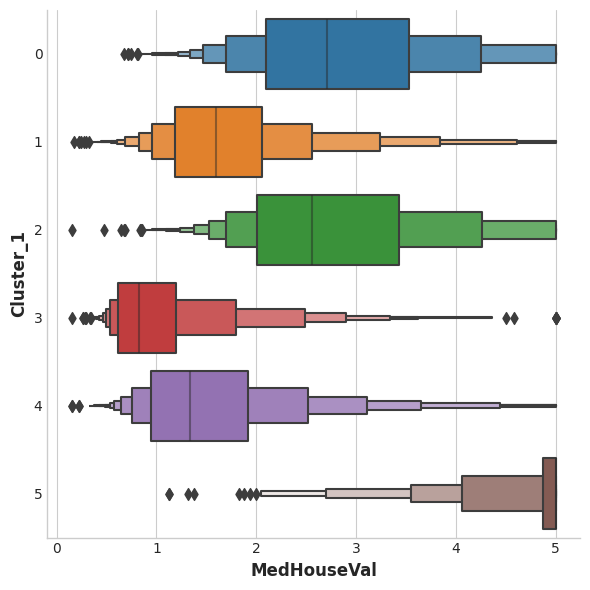

In [26]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster_1", data=X, kind="boxen", height=6);

# Your Turn #

[**Add a feature of cluster labels**](https://www.kaggle.com/kernels/fork/14393920) to *Ames* and learn about another kind of feature clustering can create.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*